## Salary_hike -> Build a prediction model for Salary_hike

### Bussines Problem - To build a prediction model for salary hike

#### 1. Importing the required libraries

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

#### 2. Importing the required data

In [3]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### 3. Data Understanding

In [4]:
salary_data.shape

(30, 2)

In [5]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
salary_data.describe(include = 'all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### 4 (a). Renaming Columns

In [10]:
salary_data = salary_data.rename(columns ={'YearsExperience':'experience_data','Salary':'salary_data'})
salary_data

,experience_data,salary_data
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#### 4 (b). Check if the Assumptions are matching

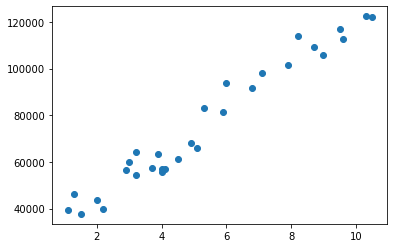

In [11]:
plt.scatter(x = 'experience_data', y = 'salary_data', data = salary_data)

In [12]:
# correlation analysis
salary_data.corr()

,experience_data,salary_data
experience_data,1.000000,0.978242
salary_data,0.978242,1.000000


<AxesSubplot:xlabel='experience_data', ylabel='salary_data'>

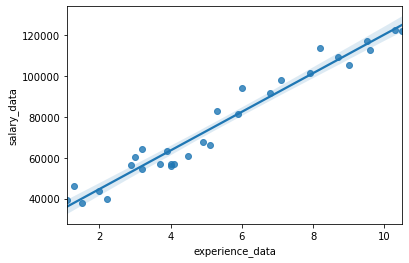

In [13]:
sns.regplot(x = 'experience_data',y = 'salary_data', data = salary_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience_data  30 non-null     float64
 1   salary_data      30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='salary_data', ylabel='Density'>

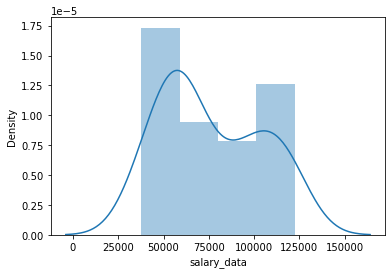

In [14]:
salary_data.info()
sns.distplot(salary_data['salary_data'])

<AxesSubplot:xlabel='experience_data', ylabel='Density'>

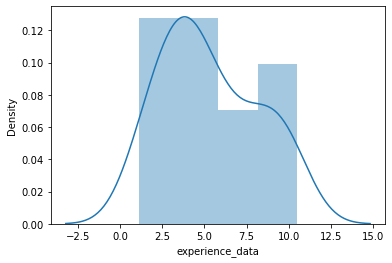

In [16]:
sns.distplot(salary_data['experience_data'])

#### 5. Model Building || 6. Model Training

There are basically 2 libraries that support Leniar Regression algorithm
1. Statsmodels libraries
2. sklearn libraries

In [17]:
linear_model = smf.ols(formula = 'salary_data~experience_data', data = salary_data).fit()
linear_model

#### 7. Model Testing

In [18]:
# Finding Coefficient parameters
linear_model.params

Intercept          25792.200199
experience_data     9449.962321
dtype: float64

In [19]:
# Finding tvalues and pvalues
linear_model.tvalues, linear_model.pvalues

(Intercept          11.346940
 experience_data    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 experience_data    1.143068e-20
 dtype: float64)

In [20]:
# Finding Rsquared values
linear_model.rsquared, linear_model.rsquared_adj


(0.9569566641435086, 0.9554194021486339)

#### 8. Model Prediction

* Manual prediction for sorting time say 4

In [22]:
salary_data = (25792.200199) + (9449.962321) * 4
salary_data

63592.049483

#### 9. Automatic Prediction

* Automatic prediction for sorting time say 4, 6

In [27]:
new_data = pd.Series([4,6])
new_data

0    4
1    6
dtype: int64

In [30]:
data_pred = pd.DataFrame(new_data, columns = ['experience_data'])
data_pred

,experience_data
0,4
1,6


In [31]:
linear_model.predict(data_pred)

0    63592.049484
1    82491.974127
dtype: float64

### Building a prediction model for Salary_hike is done